**SIMPLE LINEAR REGRESSION**

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv( '50_Startups.csv' )
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


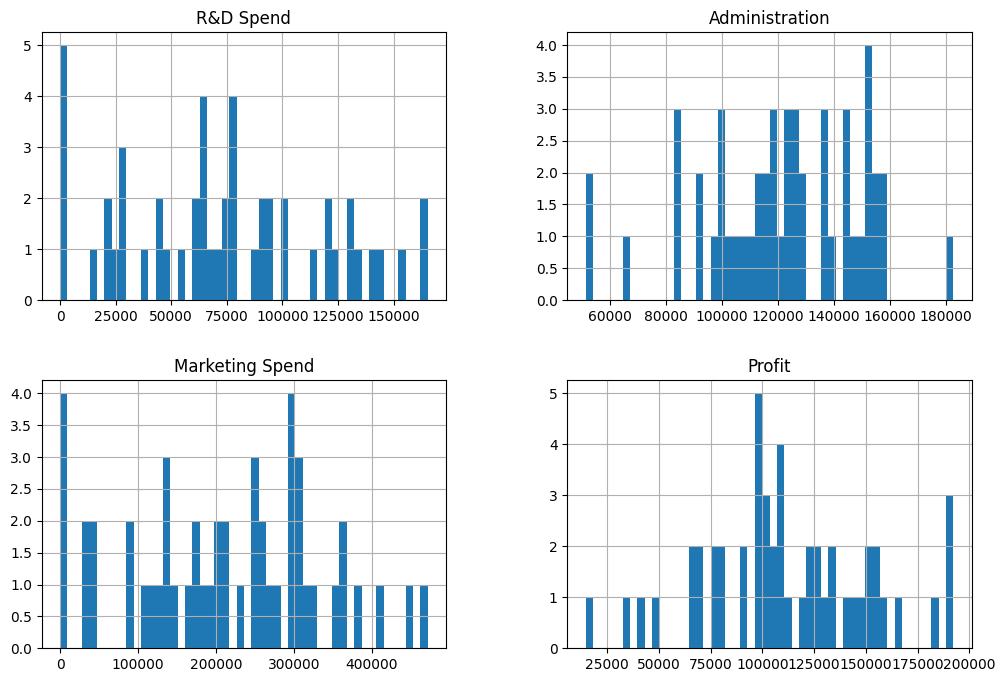

In [5]:
df.hist(bins=50, figsize=(12,8))
plt.show()

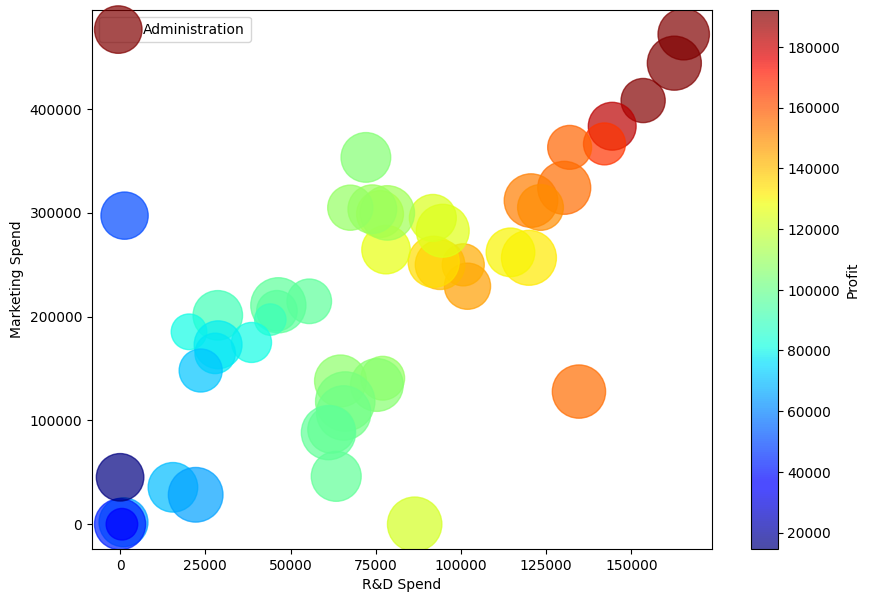

In [6]:
df.plot(kind="scatter", x="R&D Spend", y="Marketing Spend", c="Profit", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['Administration']/100, label="Administration", alpha=0.7)
plt.show()

In [7]:
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [8]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [9]:
X = df[["Marketing Spend"]]
y = df["Profit"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
r2_score( y_test, y_pred)

-0.11205578997827947

In [15]:
print(lr.intercept_)

48923.31296724075


In [16]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([182462.19522503])

In [17]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [18]:
#some bonus points.
#model persistance (saving and loading trained models)
import pickle

In [19]:
# save the trained model lr to a file named 'model.pkl'
with open('model.pkl', 'wb') as f:  # Use 'wb' to write in binary mode for pickle
    pickle.dump(lr, f)  # Save the lr model

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [20]:
X[0:5]

,Marketing Spend
0,471784.10
1,443898.53
2,407934.54
3,383199.62
4,366168.42


In [21]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([182462.19522503, 174569.16142223, 164389.52411328, 157388.28441585,
       152567.58907765])

In [22]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  120440.331743
39   81005.76   98457.010516
30   99937.59   74718.086315
45   64926.08   49462.221939
17  125370.37  128906.206651


**MULTIPLE LINEAR REGRESSION**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv( '50_Startups.csv' )

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
X = df.drop(columns=['Profit'])
y = df['Profit']

In [26]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (50, 4)
Shape of y: (50,)


In [27]:
# =======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 900533964.2328
  R² Score: -0.1121


In [28]:
print(model_multiple.intercept_)

48923.31296724075


In [29]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [31]:
# Assuming X, y are already defined (from df.drop and df['Profit'])

# Create new X_train and X_test containing all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features (if not already defined)
categorical_features = ['State']

# Create or redefine the ColumnTransformer (if not already created)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.select_dtypes(include=np.number).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Preprocess the new X_train and X_test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Fit the model on the encoded data
model_multiple = LinearRegression()
model_multiple.fit(X_train_encoded, y_train)

# Make predictions
y_pred_multiple = model_multiple.predict(X_test_encoded)

# ... (rest of your code for calculating metrics and printing results)

In [32]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

       Actual      Predicted
13  134307.35  126362.879083
39   81005.76   84608.453836
30   99937.59   99677.494251
45   64926.08   46357.460686
17  125370.37  128750.482885
